# Prerequisites

- Python 3.10.4

> Warning: Installation from conda environment may take few minutes

Configuring conda environment
```cmd
conda create -n ca2_env
conda activate ca2_env
conda install -c plotly plotly_express
conda install -c conda-forge python-kaleido
conda install -c anaconda seaborn
conda install -c conda-forge geojson
```

Installing jupyter notebook on ca2_env environment
```cmd
conda install jupyter notebook
python -m ipykernel install --name ca2_env
```

Run jupiter 
```cmd
jupyter notebook
```

In [1]:
from preamble import agriculture
import pandas as pd
import plotly.express as px
import seaborn as sns

# Economic Accounts in Agriculture DataSets
- Labour productivity
  - aact_eaa06: Economic accounts for agriculture - agricultural income (indicators A, B, C)
  - aact_eaa05: Economic accounts for agriculture - indices: volume, price, values
  - aact_ali02: Agricultural labour input statistics: indices
  

## Labour productivity
### aact_eaa06: Economic accounts for agriculture - agricultural income (indicators A, B, C)

In [2]:
aact_eaa06_df = pd.read_csv("../data/eurostat/economic_accounts/aact_eaa06_linear.csv")

In [3]:
aact_eaa06_df.head(5)

,DATAFLOW,LAST UPDATE,freq,itm_newa,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AACT_EAA06(1.0),14/03/22 11:00:00,A,IND_A_EURO,I05,AT,1990,81.95,NaN
1,ESTAT:AACT_EAA06(1.0),14/03/22 11:00:00,A,IND_A_EURO,I05,AT,1991,81.44,NaN
2,ESTAT:AACT_EAA06(1.0),14/03/22 11:00:00,A,IND_A_EURO,I05,AT,1992,76.18,NaN
3,ESTAT:AACT_EAA06(1.0),14/03/22 11:00:00,A,IND_A_EURO,I05,AT,1993,72.65,NaN
4,ESTAT:AACT_EAA06(1.0),14/03/22 11:00:00,A,IND_A_EURO,I05,AT,1994,83.92,NaN


In [4]:
aact_eaa06_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     8458 non-null   object 
 1   LAST UPDATE  8458 non-null   object 
 2   freq         8458 non-null   object 
 3   itm_newa     8458 non-null   object 
 4   unit         8458 non-null   object 
 5   geo          8458 non-null   object 
 6   TIME_PERIOD  8458 non-null   int64  
 7   OBS_VALUE    8458 non-null   float64
 8   OBS_FLAG     216 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 594.8+ KB


In [5]:
aact_eaa06_df.describe()

,TIME_PERIOD,OBS_VALUE
count,8458.000000,8458.000000
mean,2005.727477,187.909479
std,9.873103,3566.378914
min,1974.000000,0.000000
25%,2001.000000,91.142500
50%,2007.000000,102.370000
75%,2013.000000,118.197500
max,2021.000000,233548.900000


In [6]:
aact_eaa06_df.isnull().sum()

DATAFLOW          0
LAST UPDATE       0
freq              0
itm_newa          0
unit              0
geo               0
TIME_PERIOD       0
OBS_VALUE         0
OBS_FLAG       8242
dtype: int64

In [7]:
aact_eaa06_df.itm_newa.unique()
# IND_A_EURO	Indicator A: Index of the real income of factors in agriculture per annual work unit
# IND_B_EURO	Indicator B: Index of real net agricultural entrepreneurial income, per unpaid annual work unit
# IND_C_EURO	Indicator C: Net entrepreneurial income of agriculture


array(['IND_A_EURO', 'IND_B_EURO', 'IND_C_EURO'], dtype=object)

  
  ### aact_eaa05: Economic accounts for agriculture - indices: volume, price, values

In [8]:
aact_eaa05_df = pd.read_csv("../data/eurostat/economic_accounts/aact_eaa05_linear.csv")

In [9]:
aact_eaa05_df.shape

(3646543, 11)

In [10]:
aact_eaa05_df.head(5)

,DATAFLOW,LAST UPDATE,freq,itm_newa,indic_ag,p_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,1000,PROD_BP,NP,I05,AT,1990,257.75,NaN
1,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,1000,PROD_BP,NP,I05,AT,1991,249.91,NaN
2,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,1000,PROD_BP,NP,I05,AT,1992,242.05,NaN
3,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,1000,PROD_BP,NP,I05,AT,1993,243.46,NaN
4,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,1000,PROD_BP,NP,I05,AT,1994,242.91,NaN


In [11]:
aact_eaa05_df.indic_ag.unique()
# PROD_BP	Production value at basic price
# PROD_PP	Production value at producer price
# SUBS	Subsidies on products
# TAX	Taxes on products

array(['PROD_BP', 'PROD_PP', 'SUBS', 'TAX'], dtype=object)

In [12]:
aact_eaa05_df.isnull().sum()

DATAFLOW             0
LAST UPDATE          0
freq                 0
itm_newa             0
indic_ag             0
p_adj                0
unit                 0
geo                  0
TIME_PERIOD          0
OBS_VALUE        11110
OBS_FLAG       3570773
dtype: int64

  
  ### aact_ali02: Agricultural labour input statistics: indices

In [13]:
aact_ali02_df = pd.read_csv("../data/eurostat/agricultural_income/aact_ali02_linear.csv")

In [14]:
aact_ali02_df.head()

,DATAFLOW,LAST UPDATE,freq,unit,itm_newa,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AACT_ALI02(1.0),14/03/22 11:00:00,A,I05,40000,AT,1990,155.76,NaN
1,ESTAT:AACT_ALI02(1.0),14/03/22 11:00:00,A,I05,40000,AT,1991,156.25,NaN
2,ESTAT:AACT_ALI02(1.0),14/03/22 11:00:00,A,I05,40000,AT,1992,148.91,NaN
3,ESTAT:AACT_ALI02(1.0),14/03/22 11:00:00,A,I05,40000,AT,1993,142.44,NaN
4,ESTAT:AACT_ALI02(1.0),14/03/22 11:00:00,A,I05,40000,AT,1994,136.18,NaN


In [15]:
aact_ali02_df.itm_newa.unique()
# 40000	Total labour force input
# 41000	Non-salaried
# 42000	Salaried

array([40000, 41000, 42000], dtype=int64)

## Ireland

In [16]:
# 40000	Total labour force input
ie_labour_force_df = aact_ali02_df.query("geo=='IE' and itm_newa==40000")

# PROD_PP	Production value at producer price
ie_procution_value_producer_price_df = aact_eaa05_df.query("geo=='IE' and indic_ag=='PROD_PP'")

# IND_A_EURO	Indicator A: Index of the real income of factors in agriculture per annual work unit
ie_indicator_a_df = aact_eaa06_df.query("geo=='IE' and itm_newa=='IND_A_EURO'")


In [17]:
ie_labour_force_df.shape, ie_procution_value_producer_price_df.shape, ie_indicator_a_df.shape

((64, 9), (20259, 11), (77, 9))

### Visualize Production value at producer price

In [18]:
prod_pp_codelist_pd = pd.read_csv("../data/eurostat/economic_accounts/aact_eaa05_codelists/ESTAT_ITM_NEWA_en.tsv", 
                                  sep='\t',names=["code","code_name"])

In [19]:
prod_pp_codelist_pd

,code,code_name
0,01000,Cereals (including seeds)
1,01100,Wheat and spelt
2,01110,Soft wheat and spelt
3,01120,Durum wheat
4,01200,Rye and meslin
...,...,...
211,IND_B_EURO,Indicator B: Index of real net agricultural en...
212,IND_C_EURO,Indicator C: Net entrepreneurial income of agr...
213,IND_A,Indicator A: Index of the real income of facto...
214,IND_B,Indicator B: Index of real net agricultural en...


In [20]:
prod_pp_codelist_pd["description"] =  '(' + prod_pp_codelist_pd.code + ') ' + prod_pp_codelist_pd.code_name

In [21]:
# convert itm_newa to string 1000 -> 01000
ie_procution_value_producer_price_df["itm_newa"] = ie_procution_value_producer_price_df.itm_newa.apply(lambda x: f'{x:05d}')

C:\Users\rmsry\AppData\Local\Temp\ipykernel_21836\882987090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ie_procution_value_producer_price_df["itm_newa"] = ie_procution_value_producer_price_df.itm_newa.apply(lambda x: f'{x:05d}')


In [22]:
ie_procution_value_producer_price_df = ie_procution_value_producer_price_df.merge(
    prod_pp_codelist_pd,
    left_on="itm_newa",
    right_on="code",
    how="inner")

In [23]:
ie_procution_value_producer_price_df

,DATAFLOW,LAST UPDATE,freq,itm_newa,indic_ag,p_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,code,code_name,description
0,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,01000,PROD_PP,NP,I05,IE,1990,120.01,NaN,01000,Cereals (including seeds),(01000) Cereals (including seeds)
1,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,01000,PROD_PP,NP,I05,IE,1991,121.31,NaN,01000,Cereals (including seeds),(01000) Cereals (including seeds)
2,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,01000,PROD_PP,NP,I05,IE,1992,115.23,NaN,01000,Cereals (including seeds),(01000) Cereals (including seeds)
3,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,01000,PROD_PP,NP,I05,IE,1993,111.15,NaN,01000,Cereals (including seeds),(01000) Cereals (including seeds)
4,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,01000,PROD_PP,NP,I05,IE,1994,95.46,NaN,01000,Cereals (including seeds),(01000) Cereals (including seeds)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20254,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,18000,PROD_PP,VOL,I_N_1,IE,2017,103.83,NaN,18000,OUTPUT OF THE AGRICULTURAL 'INDUSTRY',(18000) OUTPUT OF THE AGRICULTURAL 'INDUSTRY'
20255,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,18000,PROD_PP,VOL,I_N_1,IE,2018,101.30,NaN,18000,OUTPUT OF THE AGRICULTURAL 'INDUSTRY',(18000) OUTPUT OF THE AGRICULTURAL 'INDUSTRY'
20256,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,18000,PROD_PP,VOL,I_N_1,IE,2019,103.89,NaN,18000,OUTPUT OF THE AGRICULTURAL 'INDUSTRY',(18000) OUTPUT OF THE AGRICULTURAL 'INDUSTRY'
20257,ESTAT:AACT_EAA05(1.0),14/03/22 11:00:00,A,18000,PROD_PP,VOL,I_N_1,IE,2020,101.46,NaN,18000,OUTPUT OF THE AGRICULTURAL 'INDUSTRY',(18000) OUTPUT OF THE AGRICULTURAL 'INDUSTRY'


In [24]:
ie_eaa_df = ie_procution_value_producer_price_df[["code","description","p_adj","unit", "freq", "TIME_PERIOD","OBS_VALUE"]]
ie_eaa_df.columns = ["code","description","price_adj","unit","frequence","year","value"]

In [25]:
ie_eaa_df.groupby("unit").size()

unit
I05      6830
I10      6297
I_N_1    7132
dtype: int64

<AxesSubplot:xlabel='year', ylabel='value'>

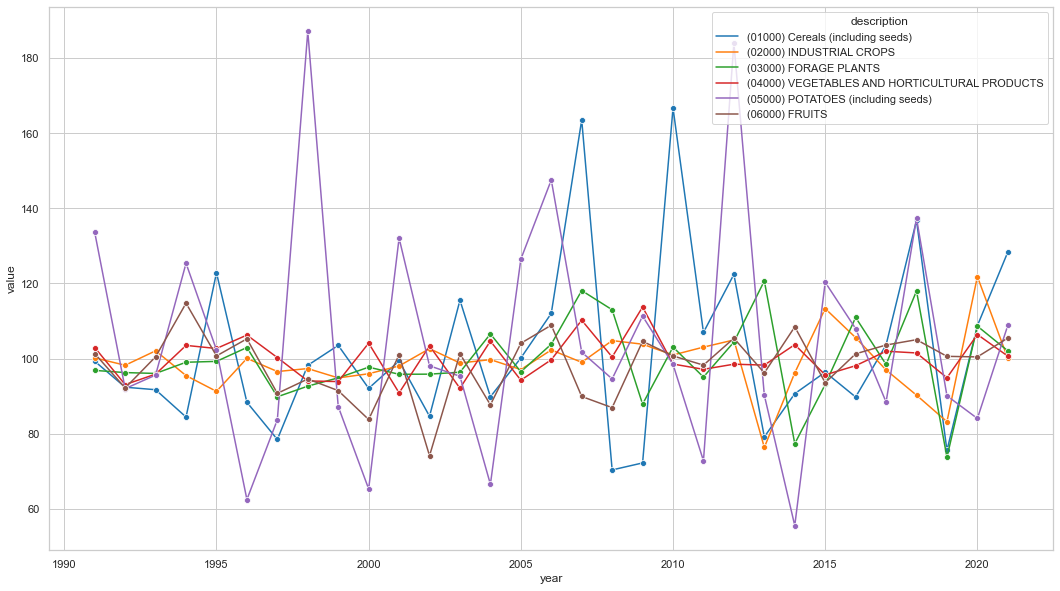

In [26]:
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(18,10))
filter_items = ["01000","02000","03000","04000","05000","06000"]
sns.lineplot(data=ie_eaa_df.query("unit == 'I_N_1' and price_adj=='RP' and code in @filter_items"),
            palette="tab10", 
            hue="description", 
            x="year", 
            y="value",
            marker="o")

# Interactive Dashboards
## Indicator A

In [27]:
import plotly.graph_objects as go

In [28]:
country_codes = pd.read_csv("../data/country_codes.tsv", sep='\t')
country_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [29]:
incidator_a_df = aact_eaa06_df.query("itm_newa=='IND_A_EURO'")
incidator_a_df = incidator_a_df.merge(country_codes,left_on="geo", right_on="Alpha-2 code", how="inner")

In [30]:
import geojson
from urllib.request import urlopen
import json

    
# https://github.com/eurostat/Nuts2json
# https://raw.githubusercontent.com/eurostat/Nuts2json/master/2021/4326/20M/nutsbn_0.json
# Europe GeoJson Administrative units
# Opening JSON file

with urlopen('https://raw.githubusercontent.com/eurostat/Nuts2json/master/2021/4326/20M/nutsrg_0.json') as response:
    countries = json.load(response)


In [31]:
#incidator_a_df.query("TIME_PERIOD == 2021 and itm_newa == 'IND_A_EURO' and unit == 'I_N_1'")

In [32]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/eurostat/Nuts2json/master/2021/4326/20M/nutsrg_0.json') as response:
    counties = json.load(response)

#counties["features"][0]



In [33]:
df = incidator_a_df.query("itm_newa == 'IND_A_EURO' and unit == 'I_N_1'")
df = df.sort_values(by=['geo', 'TIME_PERIOD'])

In [34]:
#df.geo.unique()

In [35]:
#df.query("geo == 'IE'").TIME_PERIOD.sort_values().unique()

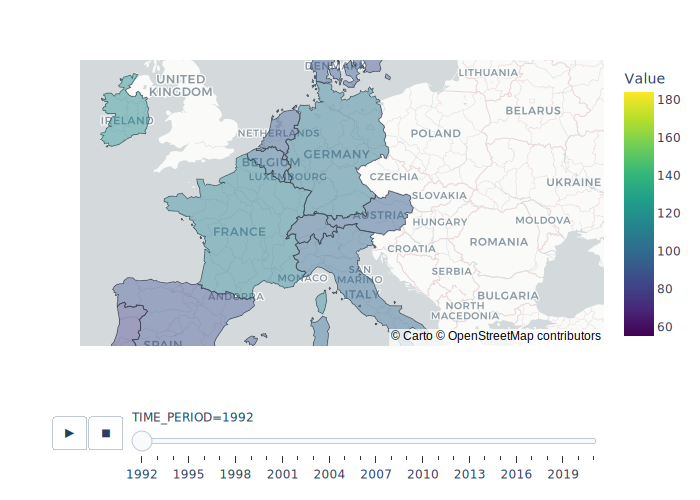

In [36]:
fig = px.choropleth_mapbox(df.query("TIME_PERIOD > 1991"),
                           geojson=counties,
                           locations='geo',
                           featureidkey="properties.id",
                           animation_frame="TIME_PERIOD",
                           color='OBS_VALUE',
                           color_continuous_scale="Viridis",
                           range_color=(df.OBS_VALUE.min(), df.OBS_VALUE.max()),
                           mapbox_style="carto-positron",
                           zoom=3,
                           center = {"lat": 48.289228872600525, "lon": 10.897123483023739},
                           opacity=0.5,
                           labels={'OBS_VALUE':'Value'}
                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="svg")

# Create dasboard for Economic accounts for agriculture

In [37]:
import tkinter as tk
from datetime import datetime
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

eaa_dash_title     = 'Economic accounts for agriculture'
eaa_root_bg_colour = '#c7d5e0'
eaa_bg_colour      = '#1b2838'
eaa_bg_main        =  '#2a475e'
eaa_fg_colour      =  'white'
eaa_font_title     = 'Arial 20 bold'
eaa_font           = 'Arial 15 bold'
eaa_font_color     = 'Dark Grey'
eaa_small_font     = 'Arial 7 bold'


root = tk.Tk()
root.resizable(False, False)
root.geometry('1305x780')
root.title(eaa_dash_title)
root.configure(bg=eaa_root_bg_colour)

# Header
top_bg = tk.Canvas(root, width=1305, height=60, bg=eaa_bg_colour, highlightthickness=0).place(x=0, y=0)
tk.Label(top_bg,
         text=eaa_dash_title,
         font=eaa_font,
         bg=eaa_bg_colour,
         fg=eaa_fg_colour).place(x=15, y=3)
tk.Label(top_bg,
         text=datetime.now().strftime('%A, %d %B %Y'),
         font=eaa_font,
         bg=eaa_bg_colour,
         fg=eaa_fg_colour).place(x=930, y=8)

# Filters
filter_box = tk.Canvas(root, width=350, height=660, bg=eaa_bg_main, highlightthickness=0).place(x=20, y=100)
filter_box = tk.Canvas(root, width=350, height=20, bg=eaa_bg_colour, highlightthickness=0).place(x=20, y=80)
tk.Label(filter_box, text='Filters', font=eaa_small_font, bg=eaa_bg_colour,
         fg=eaa_font_color).place(x=25, y=80)

# Body - Plot
body_box = tk.Canvas(root, width=890, height=660, bg=eaa_bg_main, highlightthickness=0).place(x=390, y=100)
body_box = tk.Canvas(root, width=890, height=20, bg=eaa_bg_colour, highlightthickness=0).place(x=390, y=80)
tk.Label(body_box, text='Plot', font=eaa_small_font, bg=eaa_bg_colour,
         fg=eaa_font_color).place(x=390, y=80)


# Figure
figure1 = plt.Figure(figsize=(6,5),dpi=100) # inches as the unit of meassure for the figure.
ax=figure1.add_subplot(111)
mapbox= px.choropleth_mapbox(df.query("TIME_PERIOD > 1991"),
        geojson=counties,
        locations='geo',
        featureidkey="properties.id",
        animation_frame="TIME_PERIOD",
        color='OBS_VALUE',
        color_continuous_scale="Viridis",
        range_color=(df.OBS_VALUE.min(), df.OBS_VALUE.max()),
        mapbox_style="carto-positron",
        zoom=3,
        center = {"lat": 48.289228872600525, "lon": 10.897123483023739},
        opacity=0.5,
        labels={'OBS_VALUE':'Value'}
      )
mapbox.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


FigureCanvasTkAgg(figure1, root)


# MAINLOOP
root.mainloop()

In [38]:
import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


root = tkinter.Tk()
root.wm_title("Embedding in Tk")

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(0, 3, .01)
ax = fig.add_subplot()
line, = ax.plot(t, 2 * np.sin(2 * np.pi * t))
ax.set_xlabel("time [s]")
ax.set_ylabel("f(t)")

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()

# pack_toolbar=False will make it easier to use a layout manager later on.
toolbar = NavigationToolbar2Tk(canvas, root, pack_toolbar=False)
toolbar.update()

canvas.mpl_connect(
    "key_press_event", lambda event: print(f"you pressed {event.key}"))
canvas.mpl_connect("key_press_event", key_press_handler)

button_quit = tkinter.Button(master=root, text="Quit", command=root.quit)


def update_frequency(new_val):
    # retrieve frequency
    f = float(new_val)

    # update data
    y = 2 * np.sin(2 * np.pi * f * t)
    line.set_data(t, y)

    # required to update canvas and attached toolbar!
    canvas.draw()


slider_update = tkinter.Scale(root, from_=1, to=5, orient=tkinter.HORIZONTAL,
                              command=update_frequency, label="Frequency [Hz]")

# Packing order is important. Widgets are processed sequentially and if there
# is no space left, because the window is too small, they are not displayed.
# The canvas is rather flexible in its size, so we pack it last which makes
# sure the UI controls are displayed as long as possible.
button_quit.pack(side=tkinter.BOTTOM)
slider_update.pack(side=tkinter.BOTTOM)
toolbar.pack(side=tkinter.BOTTOM, fill=tkinter.X)
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)


tkinter.mainloop()
